In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch

In [8]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 20.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.2 MB/s eta 0:00:00:00:01


In [9]:
df_train = pd.read_csv('/kaggle/input/dbpedia-classes/DBPEDIA_train.csv')
df_test = pd.read_csv('/kaggle/input/dbpedia-classes/DBPEDIA_test.csv')
df_val = pd.read_csv('/kaggle/input/dbpedia-classes/DBPEDIA_val.csv')
df = pd.read_csv('/kaggle/input/dbpedia-classes/DBP_wiki_data.csv')

In [10]:
df_train = df_train.convert_dtypes()
df_test = df_test.convert_dtypes()
df_val = df_val.convert_dtypes()
df = df.convert_dtypes()

In [11]:
df_train.head()

,text,l1,l2,l3
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator
1,Lions is the sixth studio album by American ro...,Work,MusicalWork,Album
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",Place,NaturalPlace,Mountain
3,Cancer Prevention Research is a biweekly peer-...,Work,PeriodicalLiterature,AcademicJournal
4,The Princeton University Chapel is located on ...,Place,Building,HistoricBuilding


In [12]:
df.describe()

,word_count
count,342781.0
mean,105.525195
std,96.220057
min,2.0
25%,40.0
50%,74.0
75%,138.0
max,732.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342781 entries, 0 to 342780
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   text        342781 non-null  string
 1   l1          342781 non-null  string
 2   l2          342781 non-null  string
 3   l3          342781 non-null  string
 4   wiki_name   342781 non-null  string
 5   word_count  342781 non-null  Int64 
dtypes: Int64(1), string(5)
memory usage: 16.0 MB


# Exploratory Data Analysis (EDA)

In [14]:
# 1. Basic Dataset Overview
print("=== Dataset Sizes ===")
print(f"Training set: {len(df_train)} samples")
print(f"Validation set: {len(df_val)} samples")
print(f"Test set: {len(df_test)} samples")
print(f"Full dataset: {len(df)} samples")
print("\n=== Column Info ===")
print(df_train.info())

=== Dataset Sizes ===
Training set: 240942 samples
Validation set: 36003 samples
Test set: 60794 samples
Full dataset: 342781 samples

=== Column Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240942 entries, 0 to 240941
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    240942 non-null  string
 1   l1      240942 non-null  string
 2   l2      240942 non-null  string
 3   l3      240942 non-null  string
dtypes: string(4)
memory usage: 7.4 MB
None


<ipython-input-15-7740fec3d9f0>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-15-7740fec3d9f0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(l1_counts.index, rotation=45)
<ipython-input-15-7740fec3d9f0>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(l2_counts.index, rotation=45)
<ipython-input-15-7740fec3d9f0>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(l3_counts.index, rotation=45)


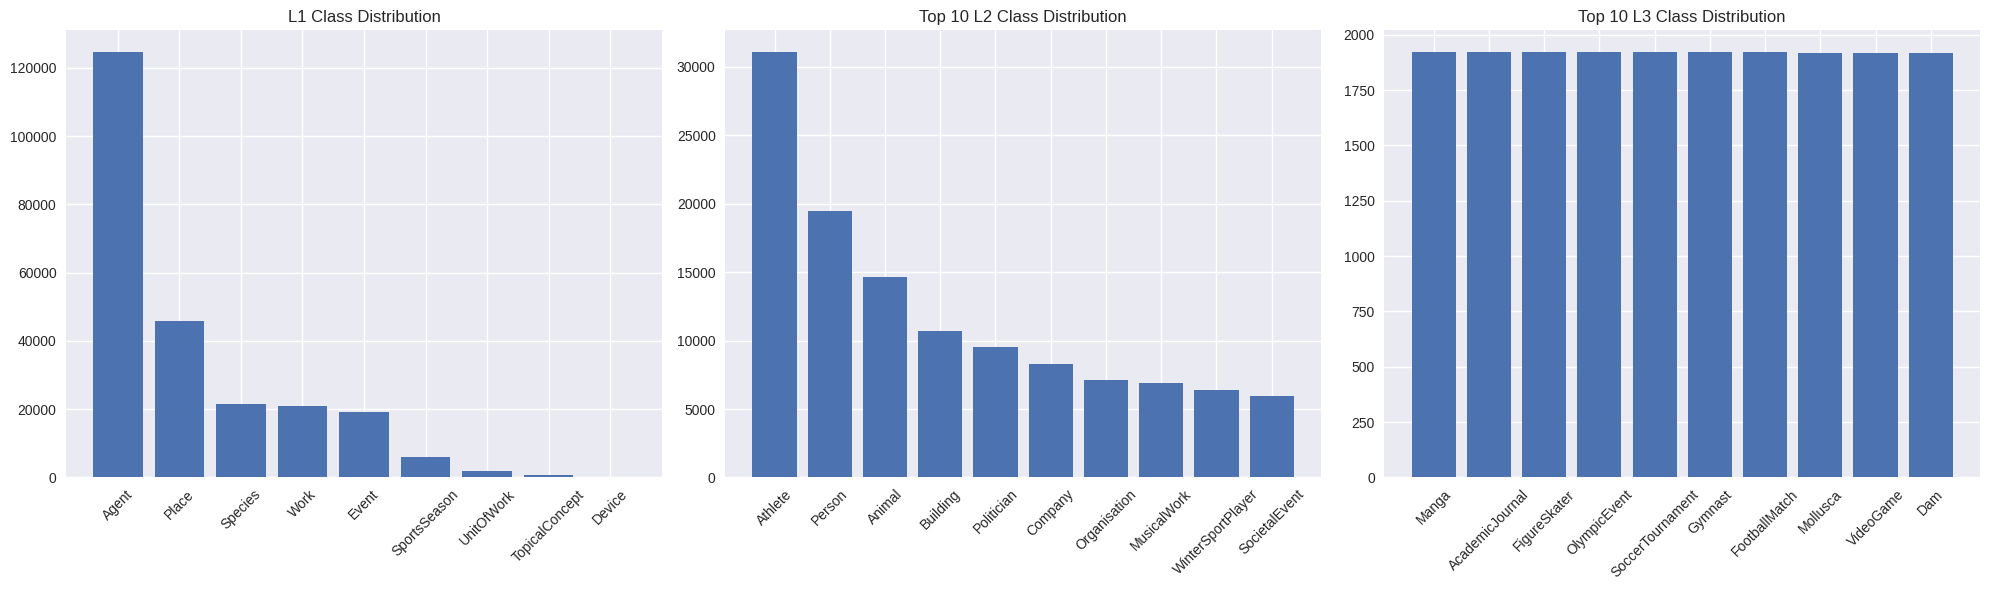


=== Class Counts ===
L1 unique classes: 9
L2 unique classes: 70
L3 unique classes: 219


In [15]:
# 2. Class Distribution Analysis
# Set up the plot style
plt.style.use('seaborn')

# Create figure for class distributions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# L1 distribution
l1_counts = df_train['l1'].value_counts()
ax1.bar(l1_counts.index, l1_counts.values)
ax1.set_title('L1 Class Distribution')
ax1.set_xticklabels(l1_counts.index, rotation=45)

# L2 distribution (top 10)
l2_counts = df_train['l2'].value_counts()[:10]
ax2.bar(l2_counts.index, l2_counts.values)
ax2.set_title('Top 10 L2 Class Distribution')
ax2.set_xticklabels(l2_counts.index, rotation=45)

# L3 distribution (top 10)
l3_counts = df_train['l3'].value_counts()[:10]
ax3.bar(l3_counts.index, l3_counts.values)
ax3.set_title('Top 10 L3 Class Distribution')
ax3.set_xticklabels(l3_counts.index, rotation=45)

plt.tight_layout()
plt.show()

# Print class counts
print("\n=== Class Counts ===")
print(f"L1 unique classes: {len(df_train['l1'].unique())}")
print(f"L2 unique classes: {len(df_train['l2'].unique())}")
print(f"L3 unique classes: {len(df_train['l3'].unique())}")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


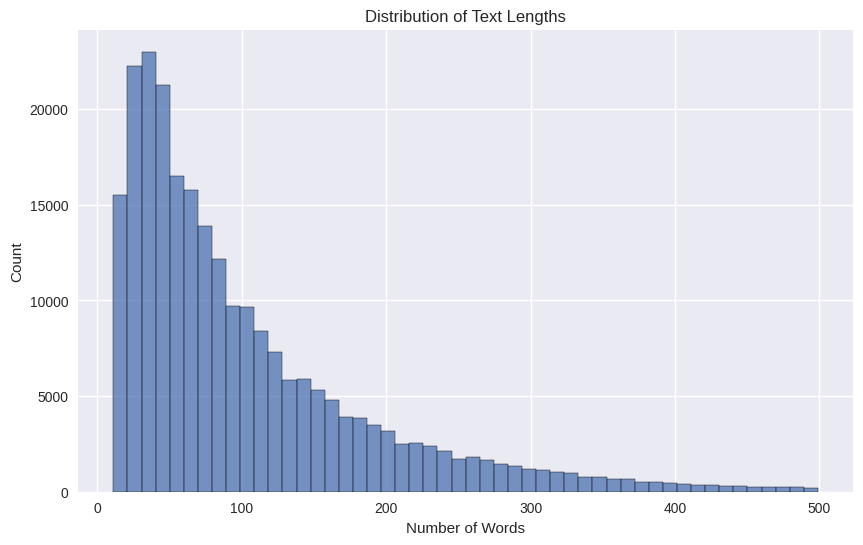


=== Text Length Statistics ===
count    240942.000000
mean        102.795569
std          87.557310
min          11.000000
25%          40.000000
50%          74.000000
75%         137.000000
max         499.000000
Name: text_length, dtype: float64


In [16]:
# 3. Text Length Analysis
# Calculate text lengths
df_train['text_length'] = df_train['text'].str.split().str.len()

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='text_length', bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

# Print statistics
print("\n=== Text Length Statistics ===")
print(df_train['text_length'].describe())

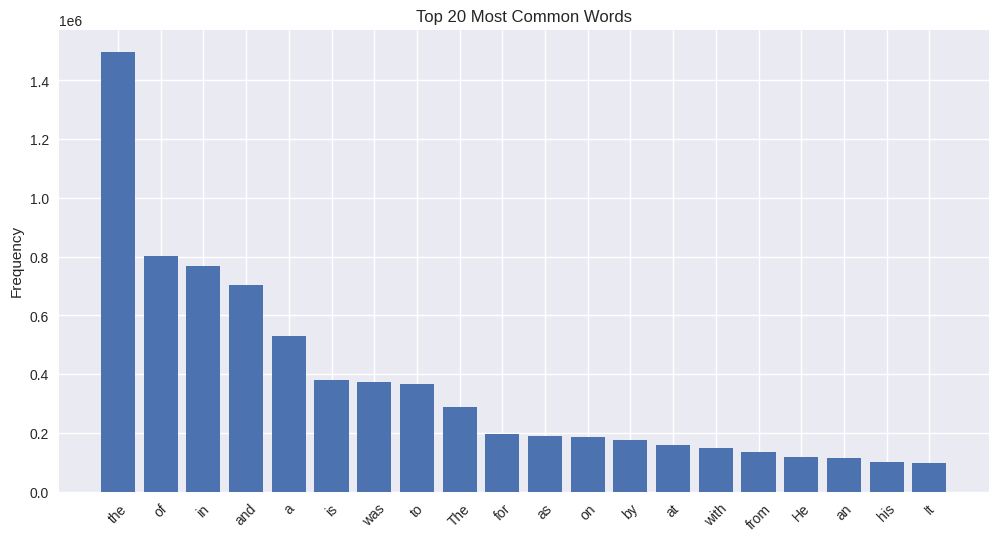

In [17]:
from collections import Counter

# 4. Word Frequency Analysis

# Get all words
all_words = ' '.join(df_train['text']).split()
word_freq = Counter(all_words)

# Get top 20 most common words
common_words = word_freq.most_common(20)

# Plot
plt.figure(figsize=(12, 6))
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

In [18]:
# 5. Hierarchical Relationship Analysis
# Count combinations of L1-L2 and L2-L3
l1_l2_combinations = df_train.groupby(['l1', 'l2']).size()
l2_l3_combinations = df_train.groupby(['l2', 'l3']).size()

print("\n=== Hierarchical Relationships ===")
print(f"Unique L1-L2 combinations: {len(l1_l2_combinations)}")
print(f"Unique L2-L3 combinations: {len(l2_l3_combinations)}")

# Show top 5 combinations for each level
print("\nTop 5 L1-L2 combinations:")
print(l1_l2_combinations.nlargest(5))
print("\nTop 5 L2-L3 combinations:")
print(l2_l3_combinations.nlargest(5))


=== Hierarchical Relationships ===
Unique L1-L2 combinations: 70
Unique L2-L3 combinations: 219

Top 5 L1-L2 combinations:
l1       l2        
Agent    Athlete       31111
         Person        19504
Species  Animal        14682
Place    Building      10704
Agent    Politician     9504
dtype: int64

Top 5 L2-L3 combinations:
l2                    l3             
Comic                 Manga              1924
PeriodicalLiterature  AcademicJournal    1924
WinterSportPlayer     FigureSkater       1924
Olympics              OlympicEvent       1923
Athlete               Gymnast            1922
dtype: int64


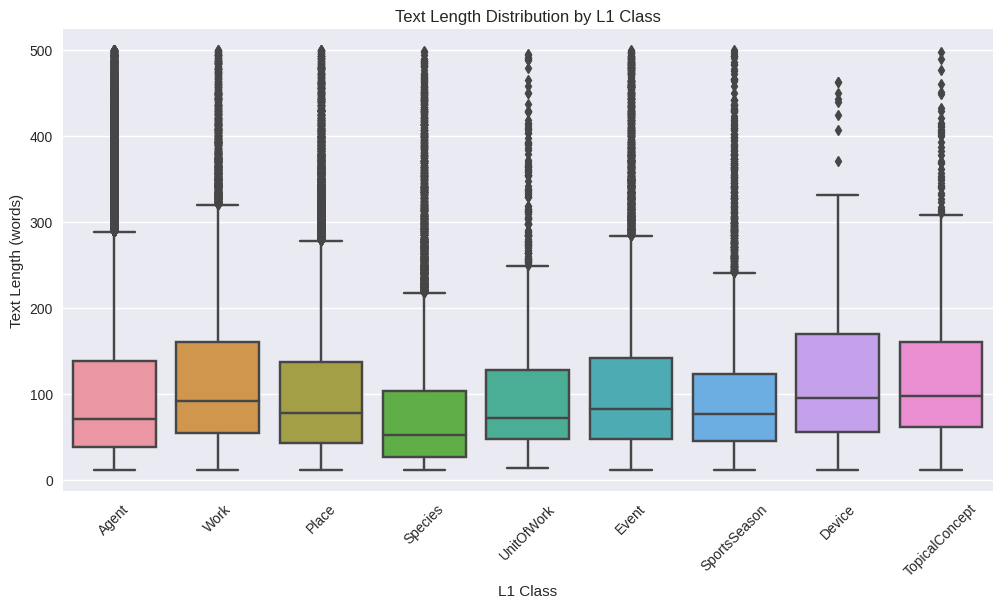


=== Mean Text Length by L1 Class ===
l1
Agent             102.890367
Device            121.717742
Event             110.508165
Place             102.718486
Species            79.100317
SportsSeason       98.460309
TopicalConcept    125.031888
UnitOfWork        102.176036
Work              119.813734
Name: text_length, dtype: float64


In [19]:
# 6. Correlation Analysis between Text Length and Classes

# Calculate text length if not already done
if 'text_length' not in df_train.columns:
    df_train['text_length'] = df_train['text'].str.split().str.len()

# Create figure
plt.figure(figsize=(12, 6))

# Box plot of text length by L1 class
sns.boxplot(x='l1', y='text_length', data=df_train)
plt.title('Text Length Distribution by L1 Class')
plt.xticks(rotation=45)
plt.xlabel('L1 Class')
plt.ylabel('Text Length (words)')
plt.show()

# Calculate mean text length per L1 class
length_by_class = df_train.groupby('l1')['text_length'].mean()
print("\n=== Mean Text Length by L1 Class ===")
print(length_by_class)

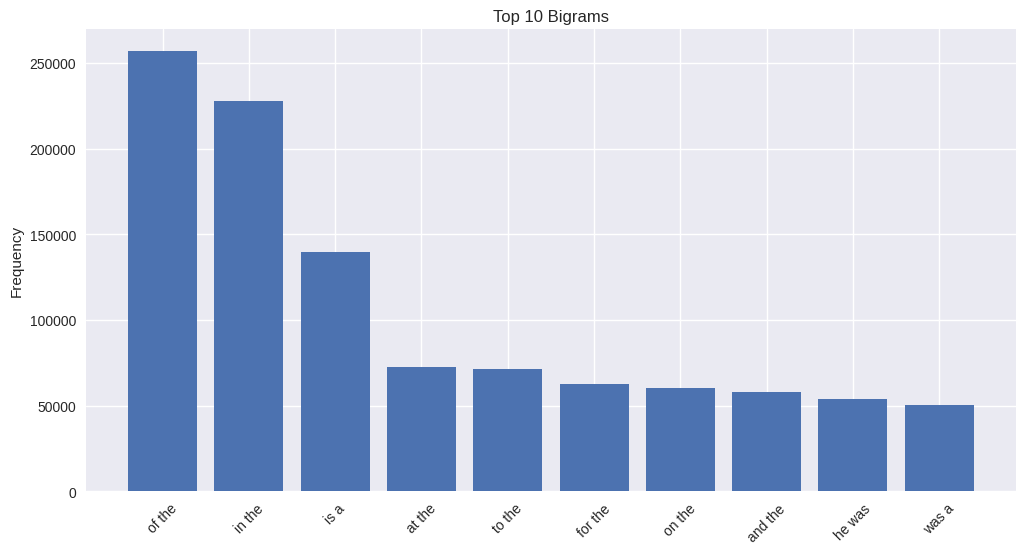

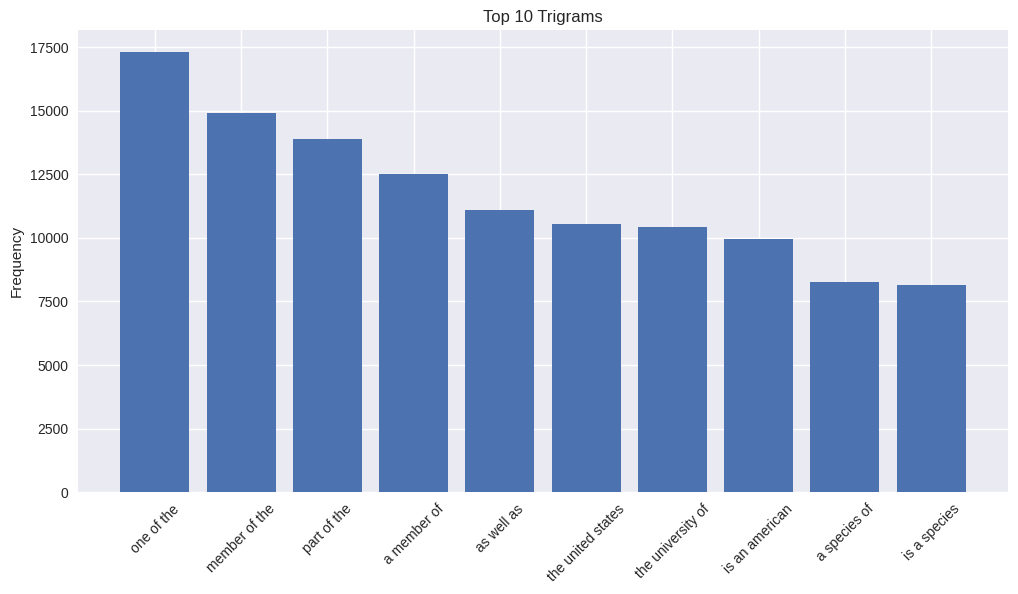

In [20]:
from nltk import ngrams
import textstat

# 7. Bigram/Trigram Analysis
# Get all text
all_text = ' '.join(df_train['text']).lower()

# Calculate bigrams and trigrams
bigrams = Counter(ngrams(all_text.split(), 2))
trigrams = Counter(ngrams(all_text.split(), 3))

# Get top 10 bigrams and trigrams
top_bigrams = bigrams.most_common(10)
top_trigrams = trigrams.most_common(10)

# Plot bigrams
plt.figure(figsize=(12, 6))
bigram_words, bigram_counts = zip(*top_bigrams)
bigram_labels = [' '.join(words) for words in bigram_words]
plt.bar(bigram_labels, bigram_counts)
plt.title('Top 10 Bigrams')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

# Plot trigrams
plt.figure(figsize=(12, 6))
trigram_words, trigram_counts = zip(*top_trigrams)
trigram_labels = [' '.join(words) for words in trigram_words]
plt.bar(trigram_labels, trigram_counts)
plt.title('Top 10 Trigrams')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


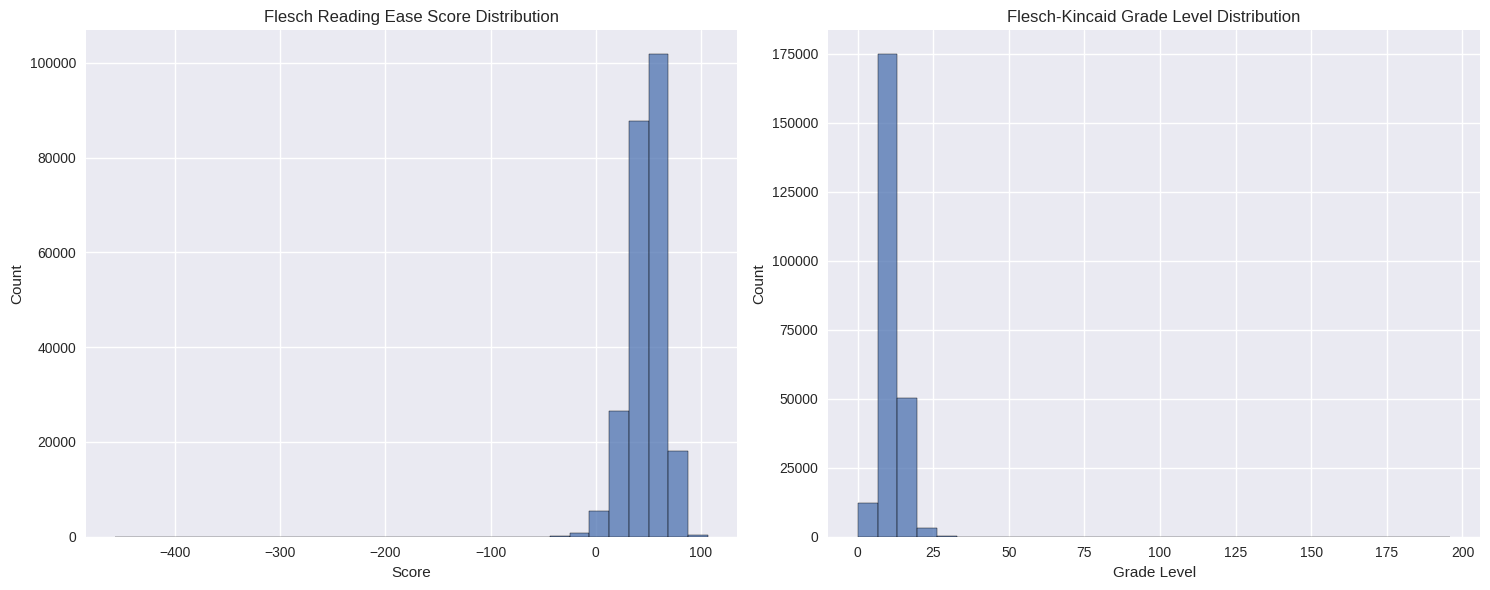


=== Text Complexity Statistics ===
Flesch Reading Ease (higher = easier):
count    240942.000000
mean         48.532537
std          16.581677
min        -457.020000
25%          39.370000
50%          50.260000
75%          59.640000
max         106.670000
Name: flesch_reading_ease, dtype: float64

Flesch-Kincaid Grade Level:
count    240942.000000
mean         11.170726
std           3.523100
min           0.100000
25%           9.000000
50%          10.800000
75%          12.900000
max         196.000000
Name: flesch_kincaid_grade, dtype: float64

=== Mean Complexity by L1 Class ===
                flesch_reading_ease  flesch_kincaid_grade
l1                                                       
Agent                     47.706843             11.308165
Device                    50.545968             10.738710
Event                     51.392104             11.059212
Place                     50.693369             10.733712
Species                   46.263315             11.147411


In [21]:
# 8. Text Complexity Analysis

# Calculate readability scores
df_train['flesch_reading_ease'] = df_train['text'].apply(textstat.flesch_reading_ease)
df_train['flesch_kincaid_grade'] = df_train['text'].apply(textstat.flesch_kincaid_grade)

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Flesch Reading Ease distribution
sns.histplot(data=df_train, x='flesch_reading_ease', bins=30, ax=ax1)
ax1.set_title('Flesch Reading Ease Score Distribution')
ax1.set_xlabel('Score')

# Flesch-Kincaid Grade distribution
sns.histplot(data=df_train, x='flesch_kincaid_grade', bins=30, ax=ax2)
ax2.set_title('Flesch-Kincaid Grade Level Distribution')
ax2.set_xlabel('Grade Level')

plt.tight_layout()
plt.show()

# Print statistics
print("\n=== Text Complexity Statistics ===")
print("Flesch Reading Ease (higher = easier):")
print(df_train['flesch_reading_ease'].describe())
print("\nFlesch-Kincaid Grade Level:")
print(df_train['flesch_kincaid_grade'].describe())

# Complexity by L1 class
complexity_by_class = df_train.groupby('l1')[['flesch_reading_ease', 'flesch_kincaid_grade']].mean()
print("\n=== Mean Complexity by L1 Class ===")
print(complexity_by_class)

# Text classification

Vocabulary size: 1091095
Number of classes: 9


Epoch 1/5: 100%|██████████| 7530/7530 [05:13<00:00, 24.05it/s]


Epoch 1:
Train Loss: 0.6869
Val Loss: 0.1106
Val Accuracy: 0.9680


Epoch 2/5: 100%|██████████| 7530/7530 [05:13<00:00, 24.02it/s]


Epoch 2:
Train Loss: 0.0786
Val Loss: 0.0625
Val Accuracy: 0.9824


Epoch 3/5: 100%|██████████| 7530/7530 [05:13<00:00, 24.06it/s]


Epoch 3:
Train Loss: 0.0361
Val Loss: 0.0557
Val Accuracy: 0.9848


Epoch 4/5: 100%|██████████| 7530/7530 [05:13<00:00, 24.05it/s]


Epoch 4:
Train Loss: 0.0194
Val Loss: 0.0549
Val Accuracy: 0.9859


Epoch 5/5: 100%|██████████| 7530/7530 [05:12<00:00, 24.06it/s]


Epoch 5:
Train Loss: 0.0108
Val Loss: 0.0616
Val Accuracy: 0.9862

Test Loss: 0.0637
Test Accuracy: 0.9852


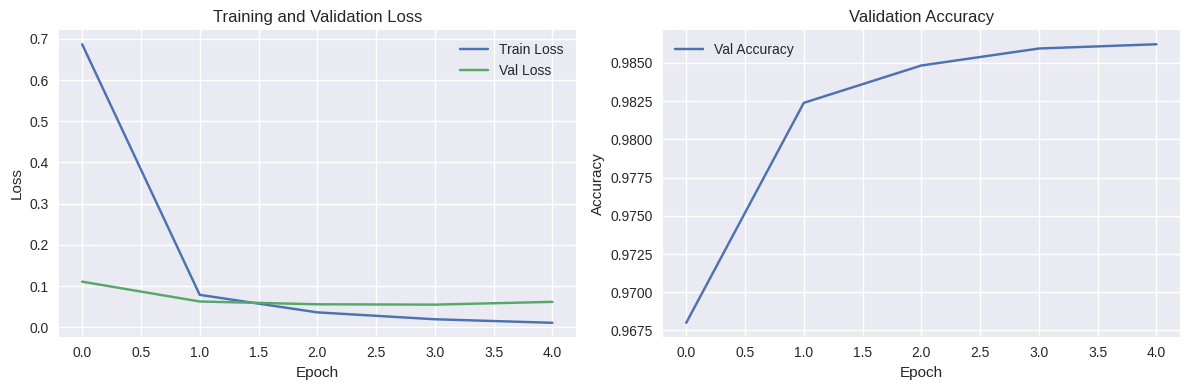

In [22]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

# Load and prepare data
df_train = pd.read_csv('/kaggle/input/dbpedia-classes/DBPEDIA_train.csv')
df_val = pd.read_csv('/kaggle/input/dbpedia-classes/DBPEDIA_val.csv')
df_test = pd.read_csv('/kaggle/input/dbpedia-classes/DBPEDIA_test.csv')

# Convert to appropriate dtypes
df_train = df_train.convert_dtypes()
df_val = df_val.convert_dtypes()
df_test = df_test.convert_dtypes()

# Simple text preprocessing and vocabulary creation
def build_vocab(texts):
    word2idx = {'<PAD>': 0, '<UNK>': 1}
    idx = 2
    for text in texts:
        for word in text.split():
            if word not in word2idx:
                word2idx[word] = idx
                idx += 1
    return word2idx

# Create vocabulary from training data
vocab = build_vocab(df_train['text'])
print(f"Vocabulary size: {len(vocab)}")

# Encode labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(df_train['l1'])
val_labels = label_encoder.transform(df_val['l1'])
test_labels = label_encoder.transform(df_test['l1'])
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

# Custom Dataset
class DBpediaDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_length=200):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx].split()
        # Convert text to indices
        indices = [self.vocab.get(word, self.vocab['<UNK>']) 
                  for word in text[:self.max_length]]
        # Pad if necessary
        if len(indices) < self.max_length:
            indices += [self.vocab['<PAD>']] * (self.max_length - len(indices))
        
        return {
            'text': torch.tensor(indices, dtype=torch.long),
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Create datasets
train_dataset = DBpediaDataset(df_train['text'].values, train_labels, vocab)
val_dataset = DBpediaDataset(df_val['text'].values, val_labels, vocab)
test_dataset = DBpediaDataset(df_test['text'].values, test_labels, vocab)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define the model
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        embedded = self.embedding(x)
        _, (hidden, _) = self.lstm(embedded)
        dropped = self.dropout(hidden[-1])
        output = self.fc(dropped)
        return output

# Model parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TextClassifier(
    vocab_size=len(vocab),
    embedding_dim=100,
    hidden_dim=128,
    num_classes=num_classes
).to(device)

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 5

# Training loop
train_losses = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0
    for batch in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        texts = batch['text'].to(device)
        labels = batch['label'].to(device)
        
        optimizer.zero_grad()
        outputs = model(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Validation phase
    model.eval()
    val_loss = 0
    val_preds = []
    val_true = []
    
    with torch.no_grad():
        for batch in val_loader:
            texts = batch['text'].to(device)
            labels = batch['label'].to(device)
            
            outputs = model(texts)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            preds = torch.argmax(outputs, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_true.extend(labels.cpu().numpy())
    
    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = accuracy_score(val_true, val_preds)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f'Epoch {epoch+1}:')
    print(f'Train Loss: {avg_train_loss:.4f}')
    print(f'Val Loss: {avg_val_loss:.4f}')
    print(f'Val Accuracy: {val_accuracy:.4f}')

# Test evaluation
model.eval()
test_preds = []
test_true = []
test_loss = 0

with torch.no_grad():
    for batch in test_loader:
        texts = batch['text'].to(device)
        labels = batch['label'].to(device)
        
        outputs = model(texts)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        preds = torch.argmax(outputs, dim=1)
        test_preds.extend(preds.cpu().numpy())
        test_true.extend(labels.cpu().numpy())

test_loss = test_loss / len(test_loader)
test_accuracy = accuracy_score(test_true, test_preds)
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training metrics
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

# Load and prepare data (minimal setup for inference)
df_train = pd.read_csv('/kaggle/input/dbpedia-classes/DBPEDIA_train.csv')
df_test = pd.read_csv('/kaggle/input/dbpedia-classes/DBPEDIA_test.csv')

# Convert to appropriate dtypes
df_train = df_train.convert_dtypes()
df_test = df_test.convert_dtypes()

# Build vocabulary from training data
def build_vocab(texts):
    word2idx = {'<PAD>': 0, '<UNK>': 1}
    idx = 2
    for text in texts:
        for word in text.split():
            if word not in word2idx:
                word2idx[word] = idx
                idx += 1
    return word2idx

vocab = build_vocab(df_train['text'])
print(f"Vocabulary size: {len(vocab)}")

# Encode labels
label_encoder = LabelEncoder()
label_encoder.fit(df_train['l1'])
num_classes = len(label_encoder.classes_)
print(f"Number of classes: {num_classes}")

# Define the model (same as your code)
class TextClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_classes):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, num_classes)
        self.dropout = nn.Dropout(0.3)
        
    def forward(self, x):
        embedded = self.embedding(x)
        _, (hidden, _) = self.lstm(embedded)
        dropped = self.dropout(hidden[-1])
        output = self.fc(dropped)
        return output

# Model parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TextClassifier(
    vocab_size=len(vocab),
    embedding_dim=100,
    hidden_dim=128,
    num_classes=num_classes
).to(device)

# Normally, you'd load a trained model here. For demo, we'll proceed untrained.
# If you have a trained model, uncomment and adjust:
# model.load_state_dict(torch.load('/kaggle/working/model.pth'))
model.eval()

# Function to preprocess a single text sample
def preprocess_text(text, vocab, max_length=200):
    words = text.split()
    indices = [vocab.get(word, vocab['<UNK>']) for word in words[:max_length]]
    if len(indices) < max_length:
        indices += [vocab['<PAD>']] * (max_length - len(indices))
    return torch.tensor(indices, dtype=torch.long).unsqueeze(0)  # Add batch dimension

# Select a single sample (e.g., first row of test set)
sample_text = df_test['text'].iloc[5]
true_label = df_test['l1'].iloc[5]
print(f"Sample Text: {sample_text}")
print(f"True Label: {true_label}")

# Preprocess the sample
input_tensor = preprocess_text(sample_text, vocab).to(device)

# Perform inference
with torch.no_grad():
    output = model(input_tensor)
    prediction = torch.argmax(output, dim=1).item()
    predicted_label = label_encoder.inverse_transform([prediction])[0]

# Print the result
print(f"Predicted Label: {predicted_label}")

# Optional: Compare with true label
print(f"Correct Prediction: {predicted_label == true_label}")

Vocabulary size: 1091095
Number of classes: 9
Sample Text: (Blooper) Bunny is an eight-minute Merrie Melodies cartoon directed by Greg Ford and Terry Lennon, with music by George Daugherty, produced in 1991 by Warner Bros. Animation. Featuring the voice talents of Jeff Bergman and Gordon Hunt, the short is a parody of some of the specials produced for Bugs Bunny's 50th anniversary the previous year. The short never received its intended theatrical release and was shelved for several years. It was finally given a television premiere on June 13, 1997, after Cartoon Network discovered the film sitting unseen in the vaults. It is featured on the Looney Tunes Golden Collection: Volume 1 as of 2003.
True Label: Work
Predicted Label: SportsSeason
Correct Prediction: False
